In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import cdist

In [2]:
df = pd.read_csv(r'C:\Users\mpiernicki\PycharmProjects\K_Means_Algorithm\DATA\basic4.csv')

In [3]:
df.drop(['color'], axis=1, inplace=True)

In [4]:
df.head()

,x,y
0,144.475109,101.450265
1,370.683312,298.003415
2,253.714046,234.079402
3,148.699165,78.654006
4,192.157973,252.837304


In [5]:
df.tail()

,x,y
12524,141.967251,238.963257
12525,161.932857,67.972458
12526,122.451461,94.133502
12527,182.881854,114.104916
12528,123.857932,92.770134


In [6]:
df.describe()

,x,y
count,12529.000000,12529.000000
mean,252.730229,200.991861
std,94.368588,79.893046
min,57.876820,28.500580
25%,175.141025,136.093748
50%,256.816991,200.790004
75%,327.379037,263.893206
max,451.220370,375.904180


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12529 entries, 0 to 12528
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       12529 non-null  float64
 1   y       12529 non-null  float64
dtypes: float64(2)
memory usage: 195.9 KB


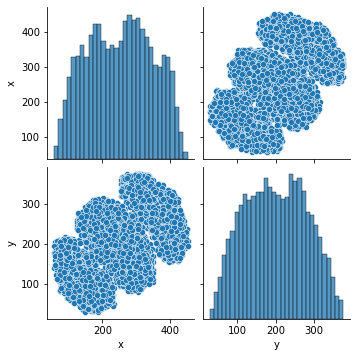

In [8]:
sns.pairplot(data=df)

In [9]:
df_norm = (df-df.min())/(df.max()-df.min())

In [10]:
df_norm

,x,y
0,144.475109,101.450265
1,370.683312,298.003415
2,253.714046,234.079402
3,148.699165,78.654006
4,192.157973,252.837304
...,...,...
12524,141.967251,238.963257
12525,161.932857,67.972458
12526,122.451461,94.133502
12527,182.881854,114.104916


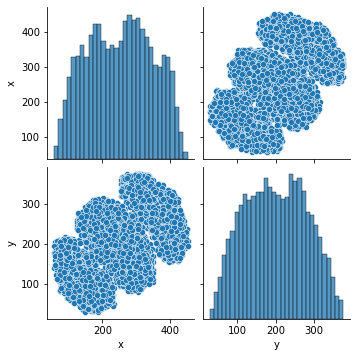

In [11]:
sns.pairplot(data=df)

In [12]:
centers = pd.DataFrame(df_norm.sample(1))

for _ in range(3 - 1):
    print(centers)
    for j in range(len(centers)):
        init_distances = ((df_norm.values - centers.iloc[[j]].values) ** 2).sum(axis=1)
        print(init_distances)
    next_center = df_norm.iloc[[np.argmax(init_distances)]]
    print(next_center)
    
    centers.loc[len(centers.index)] = next_center.iloc[0,:]

              x           y
5988  275.08918  171.788179
[22007.45757856 25068.52393592  4337.09281683 ... 29328.5219171
 11829.54964671 29114.74175848]
              x          y
3530  74.599682  81.983136
               x           y
5988  275.089180  171.788179
1      74.599682   81.983136
[22007.45757856 25068.52393592  4337.09281683 ... 29328.5219171
 11829.54964671 29114.74175848]
[  5261.54442111 134330.2768543   55215.2295317  ...   2437.42418034
  12756.83759976   2542.73451406]
                x           y
11485  422.121497  312.873193


In [13]:
centers

,x,y
5988,275.089180,171.788179
1,74.599682,81.983136
2,422.121497,312.873193


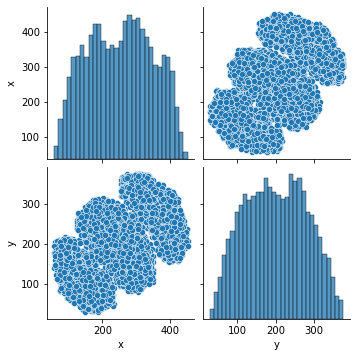

In [14]:
sns.pairplot(data=df,)

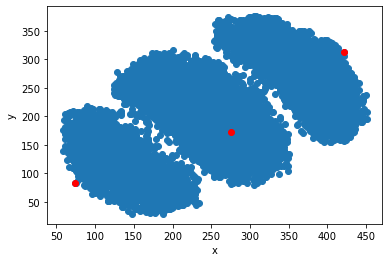

In [15]:
color=['blue','green','cyan']
plt.scatter(df['x'],df['y'])
plt.scatter(centers["x"],centers["y"],c='red')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [16]:
distances = np.zeros((len(df.index),3))

In [17]:
distances

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       ...,
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [18]:
for i in range(3):
    distances[:,i] = (((df.iloc[:, :] - centers.iloc[i, :]) ** 2).sum(axis=1)) ** 0.5
distances

array([[148.3491071 ,  72.53650406, 348.9801869 ],
       [158.33042644, 366.51095052,  53.54434719],
       [ 65.856608  , 234.97921085, 185.92883271],
       ...,
       [171.25572083,  49.37027628, 371.01102722],
       [108.76373314, 112.94617125, 311.03767318],
       [170.63042448,  50.42553435, 370.68384179]])

In [19]:
closest = np.argmin(distances, axis = 1)

In [20]:
closest

array([1, 2, 0, ..., 1, 0, 1], dtype=int64)

In [21]:
for i in range(len(centers.index)):
    centers.iloc[i] = df[closest == i].mean(axis=0)
    print(centers)

               x           y
5988  251.005177  194.809133
1      74.599682   81.983136
2     422.121497  312.873193
               x           y
5988  251.005177  194.809133
1     133.440557  115.328093
2     422.121497  312.873193
               x           y
5988  251.005177  194.809133
1     133.440557  115.328093
2     358.296724  284.607097


In [22]:
centers

,x,y
5988,251.005177,194.809133
1,133.440557,115.328093
2,358.296724,284.607097


In [23]:
# np.random.seed(4160659)
# X[closest == 0].mean(axis=0)
centers = df.sample(3)
distances = np.zeros((len(df.index),3))


while True:
    old_closest = closest.copy()
    print(closest)
    
    for i in range(3):
        distances[:,i] = (((df.iloc[:, :] - centers.iloc[i,:])**2).sum(axis=1))**0.5
    closest = np.argmin(distances, axis = 1)

    for i in range(len(centers.index)):
        centers.iloc[i] = df[closest == i].mean(axis=0)
    print(centers)
    if all(closest == old_closest):
        break

[1 2 0 ... 1 0 1]
               x           y
9710  176.275125  172.371112
6430  357.704966  277.034129
2993  282.672429  141.233367
[0 1 0 ... 0 0 0]
               x           y
9710  162.918630  163.919106
6430  351.848816  277.378392
2993  278.128272  156.142016
[0 1 2 ... 0 0 0]
               x           y
9710  155.609727  154.535761
6430  350.596869  278.080668
2993  273.716381  170.454835
[0 1 2 ... 0 0 0]
               x           y
9710  149.602905  143.283500
6430  354.371220  278.732876
2993  265.384098  185.549452
[0 1 2 ... 0 0 0]
               x           y
9710  143.889727  127.123664
6430  357.870339  278.252602
2993  254.633221  197.020363
[0 1 2 ... 0 0 0]
               x           y
9710  140.949019  115.472244
6430  358.522581  278.114331
2993  247.969759  200.448572
[0 1 2 ... 0 0 0]
               x           y
9710  140.721129  113.398460
6430  358.456207  278.010258
2993  246.593415  200.743685
[0 1 2 ... 0 0 0]
               x           y
9710  140.67810

In [24]:
closest

array([0, 1, 2, ..., 0, 0, 0], dtype=int64)

In [25]:
df['new_column'] = closest.tolist()

In [26]:
df

,x,y,new_column
0,144.475109,101.450265,0
1,370.683312,298.003415,1
2,253.714046,234.079402,2
3,148.699165,78.654006,0
4,192.157973,252.837304,2
...,...,...,...
12524,141.967251,238.963257,2
12525,161.932857,67.972458,0
12526,122.451461,94.133502,0
12527,182.881854,114.104916,0


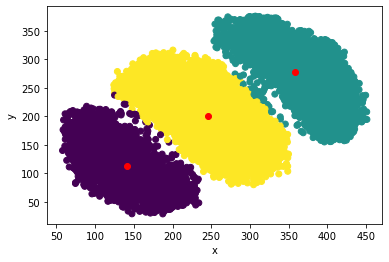

In [27]:
color=['blue','green','cyan']
plt.scatter(df['x'],df['y'], c=closest)
plt.scatter(centers["x"],centers["y"],c='red')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
